# HISTOGRAMME ET INTERPRÉTATION

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
avis = pd.read_csv('./avis.csv')
avis.fillna('', inplace=True)
avis.head()

,author,date_published,title_review,note,review_href,title,url,treated,comment
0,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8,"""https://www.trictrac.net/avis/vraiment-bon-12...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7,"""https://www.trictrac.net/avis/le-festival-de-...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,Comment continuer après un mega hit ? Simpleme...
2,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7,"""https://www.trictrac.net/avis/vivez-la-migrat...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8,,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,
4,prunelles,2021-05-24 12:43:18,Envolez-moi,9,"""https://www.trictrac.net/avis/envolez-moi""",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Très joli bijou que ce jeu-là ! Le matériel, l..."


In [3]:
details = pd.read_csv("./details_processed.csv")
details.fillna('',inplace=True)
details.head()

,categories,casting,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,,Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,,Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,Enchères|Aventures dans la jungle|Collection /...,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
3,,Édité par Arkhane Asylum Publishing,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00
4,Card-driven|Combinaison|Coopération|Deck build...,Par Maxime Rambourg et Théo RivièreIllustré pa...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70


In [4]:
category_counts = np.zeros(30)

for category in details["categories"]:
    sections = category.split('|')
    section_count = len(sections)
    if category == '':  # Vérifiez si le nombre de sections est égal à zéro
        category_counts[0] += 1
    else:
        category_counts[section_count] += 1

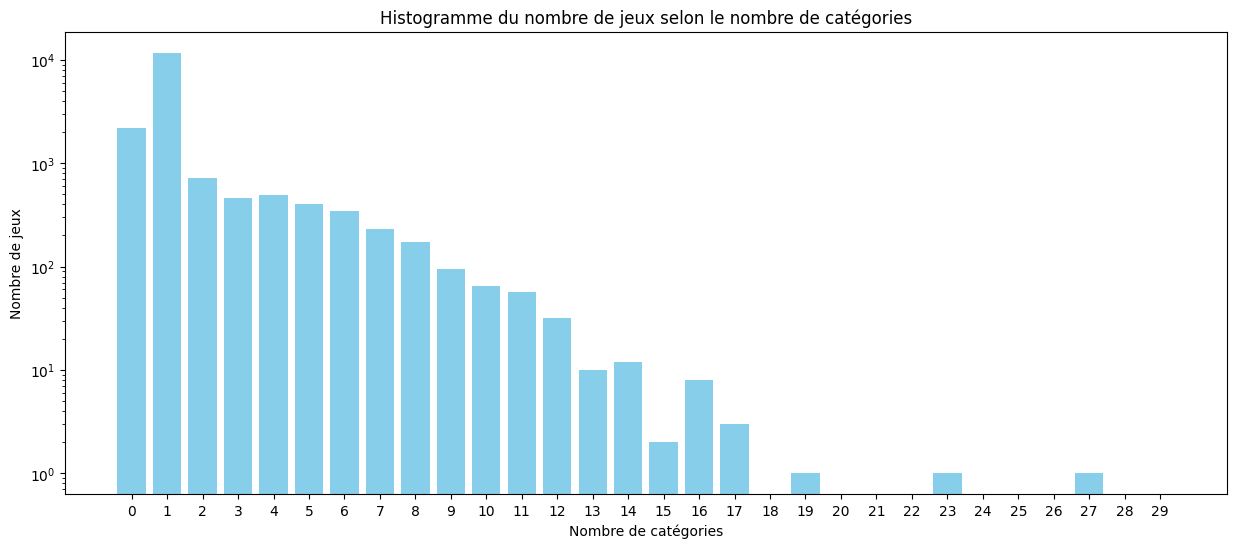

In [5]:
# Création des valeurs pour l'axe des abscisses (ajustées pour inclure le zéro)
x_values = np.arange(len(category_counts) + 1)
# Création de l'histogramme
plt.figure(figsize=(15, 6))
plt.bar(x_values[:-1], category_counts, color='skyblue')  # Utilisez x_values[:-1] pour exclure le dernier élément
plt.yscale('log')
# Ajout des étiquettes et du titre
plt.xlabel('Nombre de catégories')
plt.ylabel('Nombre de jeux')
plt.title('Histogramme du nombre de jeux selon le nombre de catégories')
plt.xticks(np.arange(30))
# Affichage 
plt.show()

Il y a 2198 jeux qui n'ont pas de catégorie du tout, ce qui pourrait indiquer une absence de classification pour ces jeux.\
La majorité des jeux (11581) sont associés à une seule catégorie, ce qui peut être considéré comme une classification simple et claire.\
Ensuite, on observe une diminution du nombre de jeux à mesure que le nombre de catégories augmente, bien que certains jeux soient associés à un nombre relativement élevé de catégories (27 au maximum dans ce cas).

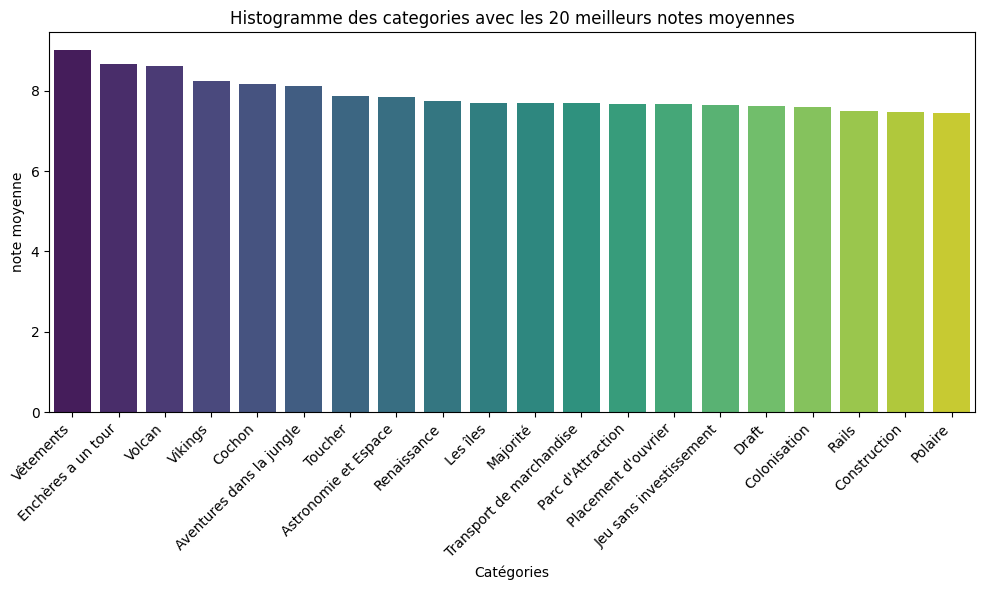

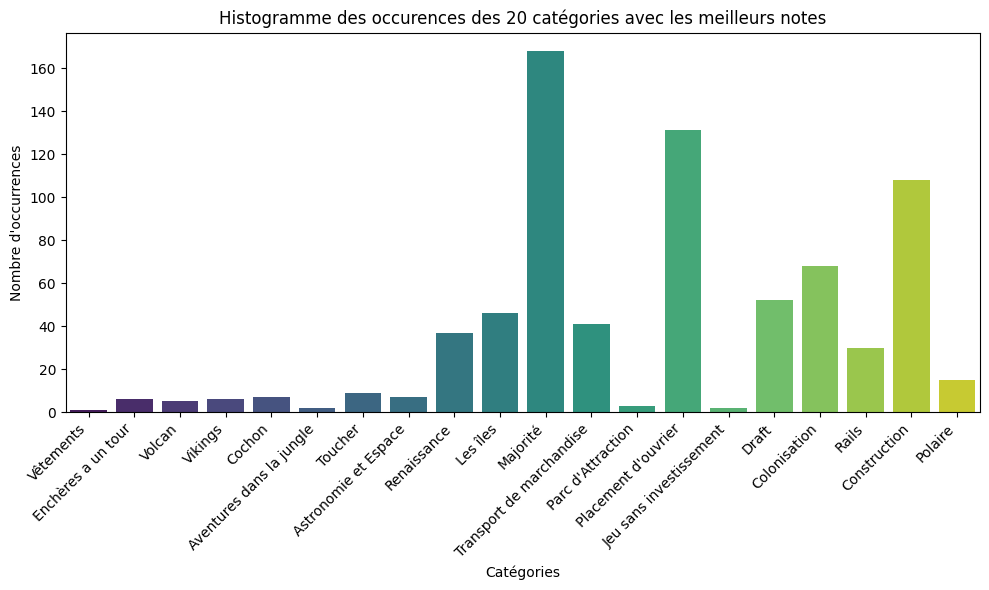

In [9]:
#histogramme des 20 meilleurs notes par categories
top_20_mieux_notée = occ_categories.sort_values(by='mean_note', ascending=False).head(20)

# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_mieux_notée, x='categories', y='mean_note', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("note moyenne")
plt.title('Histogramme des categories avec les 20 meilleurs notes moyennes')
plt.tight_layout()
plt.show()



# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_mieux_notée, x='categories', y='count', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("Nombre d'occurrences")
plt.title('Histogramme des occurences des 20 catégories avec les meilleurs notes')
plt.tight_layout()
plt.show()


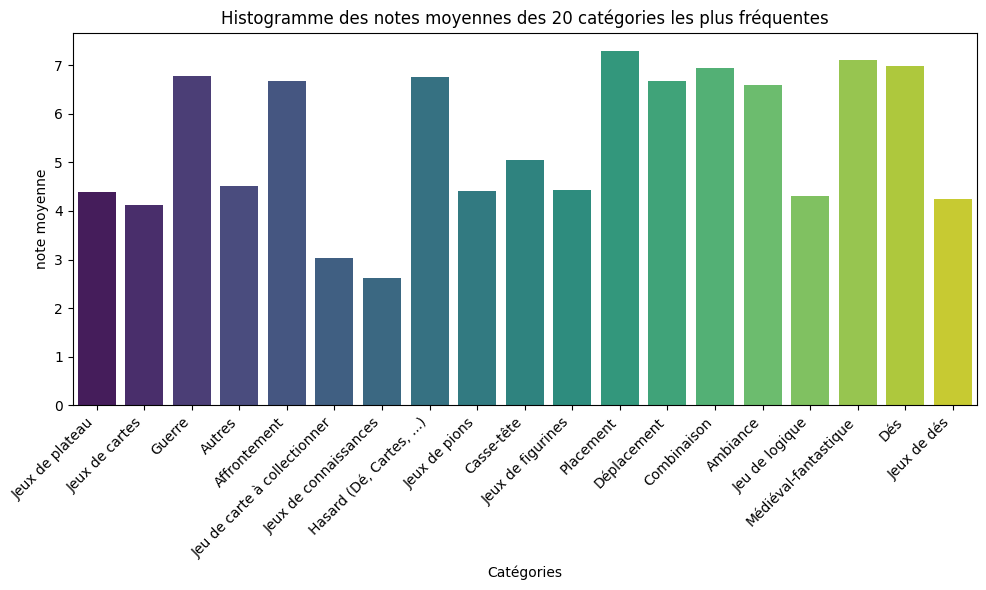

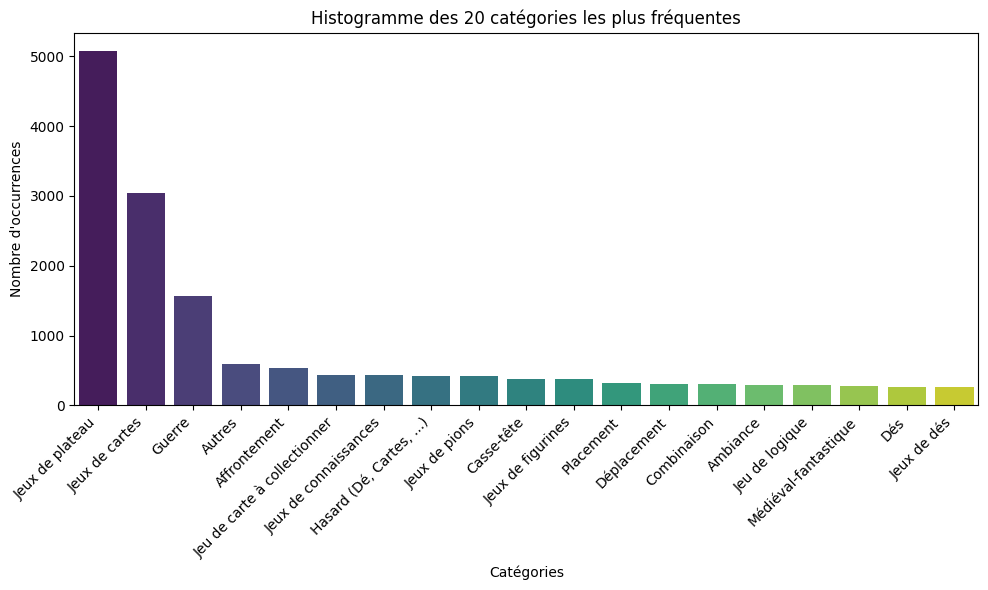

In [10]:
#histogramme des notes des 20 categories les plus joué
top_20_categories = occ_categories.sort_values(by='count', ascending=False).head(20)

# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_categories, x='categories', y='mean_note', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("note moyenne")
plt.title('Histogramme des notes moyennes des 20 catégories les plus fréquentes')
plt.tight_layout()
plt.show()

# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_categories, x='categories', y='count', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("Nombre d'occurrences")
plt.title('Histogramme des 20 catégories les plus fréquentes')
plt.tight_layout()
plt.show()